#### Stat Distribution

In [17]:
import pandas as pd
import os 
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

os.chdir('C:/Users/dalto/OneDrive/Pictures/Documents/Projects/Coding Projects/woba modeling/data/')

In [18]:
full = pd.read_csv('sim_results/full_wobacon_23_25.csv')
woba = pd.read_csv('pitch/woba/savant.csv')

#### target dist

In [19]:
woba_sample = woba[woba['pa'] > 130]
print(woba_sample.groupby('year')['wobacon'].describe())


      count      mean       std    min      25%    50%      75%    max
year                                                                  
2023  428.0  0.370327  0.061509  0.184  0.32675  0.367  0.40925  0.579
2024  422.0  0.359590  0.057881  0.217  0.32125  0.353  0.39600  0.617
2025  325.0  0.368843  0.062158  0.203  0.32800  0.364  0.40300  0.666


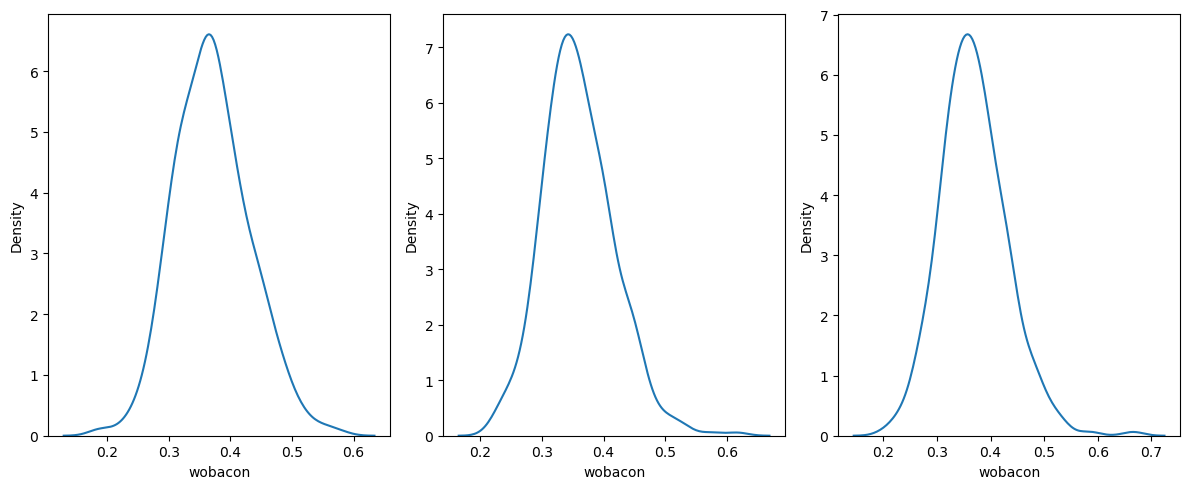

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
sns.kdeplot(x=woba_sample.loc[woba['year'] == 2023, 'wobacon'], ax=axes[0])
sns.kdeplot(x=woba_sample.loc[woba['year'] == 2024, 'wobacon'], ax=axes[1])
sns.kdeplot(x=woba_sample.loc[woba['year'] == 2025, 'wobacon'], ax=axes[2])
plt.tight_layout()
plt.show()

In [21]:
def quantile_mapping(source, target):
    source_percentiles = stats.rankdata(source, method='max') / len(source)
    
    mapped_values = np.quantile(target, source_percentiles, method='linear')
    
    return mapped_values

In [22]:
def histogram_matching(source, template):
    source = source.to_numpy()
    template = template.to_numpy()
    
    original_shape = source.shape
    source = source.ravel()
    template = template.ravel()

    s_indices = source.argsort()

    s_sorted = np.sort(source)
    t_sorted = np.sort(template)

    transformed_values = np.interp(s_sorted, t_sorted, t_sorted)

    s_transformed = np.zeros_like(source)
    
    s_transformed[s_indices] = transformed_values

    return s_transformed.reshape(original_shape)

#### fit created stat to distubtion each year

In [23]:
for year in woba['year'].unique():
    woba = woba[woba['ab'] > 30]
    monte = full[full['year'] == year]['monte']
    dist = woba[woba['year'] == year]['wobacon']

    monte_value = histogram_matching(monte, dist)
    full.loc[full['year'] == year, 'monte'] = monte_value

In [24]:
full.to_csv('transforms/wobacon.csv', index=False)